<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/0_01__Track_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading In & Checking - Administrative Wide Data

First, let's import some libraries. For this assignment, we'll need `pandas`.

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a special library for working with tables:
from tabulate import tabulate


### Reading in the data
First mount the google drive;
The data is in csv format and stored in "". Import the data into a dataframe

In [ ]:
# the code below allows you to access your Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data is at this location
inputfile = "/content/drive/My Drive/Colab Notebooks/MPP Science Replication Package/Data/Admin/csv/admin_wide data.dta.csv"

# Read the CSV file into a dataframe named admin_wide_data
admin_wide_data = pd.read_csv(inputfile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Do some simple overviews of the data
The next few cells will ask you to use different `pandas` functions to learn about the dataset.

In [ ]:
# Use `head()` to get an overview of the first few records in the dataset
admin_wide_data.head(5)

,Unnamed: 0,ps_code,urban,dist_urban,strat_pca,treatment,dist_id,regular_whd,women_whd,e_caw_rate,...,e_fir_overall_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count,e_dir_count,e_ncr_count,e_dial100_count,implement_quality,training_score,comm_outreach_strength
0,0,1001.0,Rural,1.0,-0.234041,Treatment,1000.0,0.0,1.0,0.000000,...,30,11,3,13,0,9,30.0,9.0,2.916667,2.20
1,1,1002.0,Rural,1.0,-0.960574,Control,1000.0,0.0,0.0,0.114887,...,11,2,2,2,0,2,26.0,0.0,1.545454,0.00
2,2,1003.0,Rural,1.0,1.042663,Control,1000.0,0.0,0.0,0.043200,...,68,14,9,19,0,5,11.0,0.0,1.090909,0.00
3,3,1004.0,Rural,1.0,-1.590761,Treatment,1000.0,1.0,0.0,0.000000,...,12,2,1,4,2,6,19.0,7.0,3.897297,2.03
4,4,1005.0,Rural,1.0,-1.570695,Treatment,1000.0,0.0,1.0,0.000000,...,12,0,0,0,0,0,17.0,9.0,4.157658,2.20


In [ ]:
# Check the number of rows and columns with `shape`
print(admin_wide_data.shape)

(1980, 28)


In [ ]:
# Check the data types of each column with `info()`.
# Do the 'non-null' totals for each column equal the
# number of rows you found from `shape`? Why or why
# not?
admin_wide_data.info()

# number of non-null totals does not equal the number of rows for all columns, due to missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1980 non-null   int64  
 1   ps_code                 1980 non-null   float64
 2   urban                   1980 non-null   object 
 3   dist_urban              1980 non-null   float64
 4   strat_pca               1980 non-null   float64
 5   treatment               1980 non-null   object 
 6   dist_id                 1980 non-null   float64
 7   regular_whd             1980 non-null   float64
 8   women_whd               1980 non-null   float64
 9   e_caw_rate              1980 non-null   float64
 10  month                   1980 non-null   float64
 11  b_fir_overall_count     1980 non-null   int64  
 12  b_fir_caw_count         1980 non-null   int64  
 13  b_fir_bywomen_count     1980 non-null   int64  
 14  b_arrest_count          1980 non-null   

In [ ]:
# Display the initial data types
print("Initial Data Types:")
print(admin_wide_data.dtypes)


# Fix the data types of certain columns: object to category
admin_wide_data['urban']      = admin_wide_data['urban'].astype('category')
admin_wide_data['treatment']      = admin_wide_data['treatment'].astype('category')

# Display the updated data types
print("\nUpdated Data Types:")
print(admin_wide_data.dtypes)

Initial Data Types:
Unnamed: 0                  int64
ps_code                   float64
urban                      object
dist_urban                float64
strat_pca                 float64
treatment                  object
dist_id                   float64
regular_whd               float64
women_whd                 float64
e_caw_rate                float64
month                     float64
b_fir_overall_count         int64
b_fir_caw_count             int64
b_fir_bywomen_count         int64
b_arrest_count              int64
b_dir_count                 int64
b_ncr_count                 int64
b_dial100_count           float64
e_fir_overall_count         int64
e_fir_caw_count             int64
e_fir_bywomen_count         int64
e_arrest_count              int64
e_dir_count                 int64
e_ncr_count                 int64
e_dial100_count           float64
implement_quality         float64
training_score            float64
comm_outreach_strength    float64
dtype: object

Updated Data 

In [ ]:
# Use `describe()` to get some basic statistics for numerics.

admin_wide_data.describe()


,Unnamed: 0,ps_code,dist_urban,strat_pca,dist_id,regular_whd,women_whd,e_caw_rate,month,b_fir_overall_count,...,e_fir_overall_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count,e_dir_count,e_ncr_count,e_dial100_count,implement_quality,training_score,comm_outreach_strength
count,1980.000000,1980.000000,1980.000000,1.980000e+03,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,...,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,989.500000,5857.166667,8.600000,3.157778e-09,5766.666667,0.338889,0.327778,0.092653,6.727273,31.667172,...,32.639899,4.261616,2.783333,3.585354,0.993434,45.682323,26.823232,4.933333,2.098003,1.188722
std,571.721086,3110.226318,4.897494,1.377461e+00,3059.639626,0.473452,0.469522,0.139742,3.519435,19.543756,...,19.380035,3.981925,2.142009,4.744219,2.936150,35.356019,18.597518,3.703187,1.233495,1.046854
min,0.000000,1001.000000,1.000000,-2.355807e+00,1000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,494.750000,3045.750000,4.000000,-1.110262e+00,3000.000000,0.000000,0.000000,0.000000,3.000000,17.000000,...,18.000000,1.000000,1.000000,0.000000,0.000000,21.000000,14.000000,0.000000,1.181818,0.000000
50%,989.500000,5090.500000,8.000000,-1.254049e-01,5000.000000,0.000000,0.000000,0.042641,7.000000,27.000000,...,29.000000,3.000000,3.000000,2.000000,0.000000,38.000000,21.000000,7.000000,2.174242,1.175000
75%,1484.250000,8135.250000,12.000000,9.937974e-01,8000.000000,1.000000,1.000000,0.124763,10.000000,42.000000,...,43.000000,6.000000,4.000000,5.000000,0.000000,61.000000,35.000000,8.000000,3.272622,2.150000
max,1979.000000,12180.000000,18.000000,3.986043e+00,12000.000000,1.000000,1.000000,1.001697,12.000000,120.000000,...,137.000000,23.000000,11.000000,37.000000,33.000000,232.000000,147.000000,9.000000,4.583334,3.330000


In [ ]:
# For numeric columns (the default selection), round to 2 decimal places for better readability.
numeric_summary_stats = admin_wide_data.describe().round(2)
# Print the numeric summaries:
print("Numeric Summary Statistics: (vertical)")
display(numeric_summary_stats)

# For categorical columns, include 'object' (strings), 'category', and 'bool' (true/false) types.
print("\nCategorical Summary Statistics: (vertical)")
categorical_summary_stats = admin_wide_data.describe(include = ['object', 'category', 'bool'])
# Print the categorical summaries:
display(categorical_summary_stats)

# Transpose the summary statistics tables (turn them sideways) to make them more readable, using .T
numeric_summary_stats_transposed = numeric_summary_stats.T
categorical_summary_stats_transposed = categorical_summary_stats.T

# Display the transposed summary statistics
print("\nNumeric Summary Statistics: (transposed)")
display(numeric_summary_stats_transposed)

print("\nCategorical Summary Statistics: (transposed)")
display(categorical_summary_stats_transposed)

Numeric Summary Statistics: (vertical)


,Unnamed: 0,ps_code,dist_urban,strat_pca,dist_id,regular_whd,women_whd,e_caw_rate,month,b_fir_overall_count,...,e_fir_overall_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count,e_dir_count,e_ncr_count,e_dial100_count,implement_quality,training_score,comm_outreach_strength
count,1980.00,1980.00,1980.0,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,...,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00
mean,989.50,5857.17,8.6,0.00,5766.67,0.34,0.33,0.09,6.73,31.67,...,32.64,4.26,2.78,3.59,0.99,45.68,26.82,4.93,2.10,1.19
std,571.72,3110.23,4.9,1.38,3059.64,0.47,0.47,0.14,3.52,19.54,...,19.38,3.98,2.14,4.74,2.94,35.36,18.60,3.70,1.23,1.05
min,0.00,1001.00,1.0,-2.36,1000.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,494.75,3045.75,4.0,-1.11,3000.00,0.00,0.00,0.00,3.00,17.00,...,18.00,1.00,1.00,0.00,0.00,21.00,14.00,0.00,1.18,0.00
50%,989.50,5090.50,8.0,-0.13,5000.00,0.00,0.00,0.04,7.00,27.00,...,29.00,3.00,3.00,2.00,0.00,38.00,21.00,7.00,2.17,1.17
75%,1484.25,8135.25,12.0,0.99,8000.00,1.00,1.00,0.12,10.00,42.00,...,43.00,6.00,4.00,5.00,0.00,61.00,35.00,8.00,3.27,2.15
max,1979.00,12180.00,18.0,3.99,12000.00,1.00,1.00,1.00,12.00,120.00,...,137.00,23.00,11.00,37.00,33.00,232.00,147.00,9.00,4.58,3.33



Categorical Summary Statistics: (vertical)


,urban,treatment
count,1980,1980
unique,2,2
top,Rural,Treatment
freq,1122,1320



Numeric Summary Statistics: (transposed)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1980.0,989.50,571.72,0.00,494.75,989.50,1484.25,1979.00
ps_code,1980.0,5857.17,3110.23,1001.00,3045.75,5090.50,8135.25,12180.00
dist_urban,1980.0,8.60,4.90,1.00,4.00,8.00,12.00,18.00
strat_pca,1980.0,0.00,1.38,-2.36,-1.11,-0.13,0.99,3.99
dist_id,1980.0,5766.67,3059.64,1000.00,3000.00,5000.00,8000.00,12000.00
regular_whd,1980.0,0.34,0.47,0.00,0.00,0.00,1.00,1.00
women_whd,1980.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
e_caw_rate,1980.0,0.09,0.14,0.00,0.00,0.04,0.12,1.00
month,1980.0,6.73,3.52,1.00,3.00,7.00,10.00,12.00
b_fir_overall_count,1980.0,31.67,19.54,0.00,17.00,27.00,42.00,120.00



Categorical Summary Statistics: (transposed)


,count,unique,top,freq
urban,1980,2,Rural,1122
treatment,1980,2,Treatment,1320


In [ ]:
#  Attempting to Replicate Time Series Charts From Study;

atts_to_keep = ['ps_code','month','treatment','women_whd','e_dir_count','e_fir_caw_count','e_fir_bywomen_count','e_arrest_count']

# New Dataframe Creation.

q1q2_focused_df = admin_wide_data[atts_to_keep]

q1q2_focused_df.head(5)

,ps_code,month,treatment,women_whd,e_dir_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count
0,1001.0,1.0,Treatment,1.0,0,11,3,13
1,1002.0,1.0,Control,0.0,0,2,2,2
2,1003.0,1.0,Control,0.0,0,14,9,19
3,1004.0,1.0,Treatment,0.0,2,2,1,4
4,1005.0,1.0,Treatment,1.0,0,0,0,0


In [ ]:
# Creating a New Field with Actual YYMM for the Charts;

def categorize(value):
    if value ==1:
        return "201901"
    elif value ==2:
        return "201902"
    elif value ==3:
        return "201903"
    elif value ==5:
        return "201805"
    elif value ==6:
        return "201806"
    elif value ==7:
        return "201807"
    elif value ==8:
        return "201808"
    elif value ==9:
        return "201809"
    elif value ==10:
        return "201810"
    elif value ==11:
        return "201811"
    elif value ==12:
        return "201812"
    else:
        return "999999"

q1q2_focused_df['yyyymm'] = q1q2_focused_df['month'].apply(categorize)

q1q2_focused_df.head(5)

<ipython-input-10-a5e5b6db6ab2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1q2_focused_df['yyyymm'] = q1q2_focused_df['month'].apply(categorize)


,ps_code,month,treatment,women_whd,e_dir_count,e_fir_caw_count,e_fir_bywomen_count,e_arrest_count,yyyymm
0,1001.0,1.0,Treatment,1.0,0,11,3,13,201901
1,1002.0,1.0,Control,0.0,0,2,2,2,201901
2,1003.0,1.0,Control,0.0,0,14,9,19,201901
3,1004.0,1.0,Treatment,0.0,2,2,1,4,201901
4,1005.0,1.0,Treatment,1.0,0,0,0,0,201901


In [ ]:
# Confirming YYYMM Assignment was done correctly;

group_counts_month = q1q2_focused_df.groupby('month').size()

print(group_counts_month)

group_counts_yyyymm = q1q2_focused_df.groupby('yyyymm').size()

print(group_counts_yyyymm)

month
1.0     180
2.0     180
3.0     180
5.0     180
6.0     180
7.0     180
8.0     180
9.0     180
10.0    180
11.0    180
12.0    180
dtype: int64
yyyymm
201805    180
201806    180
201807    180
201808    180
201809    180
201810    180
201811    180
201812    180
201901    180
201902    180
201903    180
dtype: int64


In [ ]:
# Calculating Mean Counts For Reporting Fields Aggregated to Treatment / Month

grouped = q1q2_focused_df.groupby(['yyyymm','treatment']).agg({'e_dir_count': 'mean', 'e_fir_caw_count': 'mean','e_fir_bywomen_count': 'mean', 'e_arrest_count': 'mean'})

# Convert the result to a DataFrame

q1_focused_df_agg = grouped.reset_index()

print(q1_focused_df_agg)

<ipython-input-12-764f5c214c49>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = q1q2_focused_df.groupby(['yyyymm','treatment']).agg({'e_dir_count': 'mean', 'e_fir_caw_count': 'mean','e_fir_bywomen_count': 'mean', 'e_arrest_count': 'mean'})


    yyyymm  treatment  e_dir_count  e_fir_caw_count  e_fir_bywomen_count  \
0   201805    Control     0.000000         3.916667             2.450000   
1   201805  Treatment     0.158333         5.000000             3.200000   
2   201806    Control     0.000000         4.383333             3.016667   
3   201806  Treatment     0.233333         5.658333             3.441667   
4   201807    Control     0.000000         4.383333             2.750000   
5   201807  Treatment     0.258333         4.983333             3.183333   
6   201808    Control     0.016667         3.366667             2.400000   
7   201808  Treatment     0.300000         3.958333             2.691667   
8   201809    Control     0.033333         3.183333             2.433333   
9   201809  Treatment     0.450000         4.033333             2.808333   
10  201810    Control     0.000000         4.033333             2.716667   
11  201810  Treatment     1.250000         4.525000             2.775000   
12  201811  

In [ ]:
means_by_group_agg = q1_focused_df_agg.groupby('treatment')[['e_dir_count', 'e_fir_caw_count','e_fir_bywomen_count','e_arrest_count']].mean()

print(means_by_group_agg)

           e_dir_count  e_fir_caw_count  e_fir_bywomen_count  e_arrest_count
treatment                                                                   
Control       0.046970         3.846970             2.577273        3.433333
Treatment     1.466667         4.468939             2.886364        3.661364


<ipython-input-13-f298dc2c7ec4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_by_group_agg = q1_focused_df_agg.groupby('treatment')[['e_dir_count', 'e_fir_caw_count','e_fir_bywomen_count','e_arrest_count']].mean()


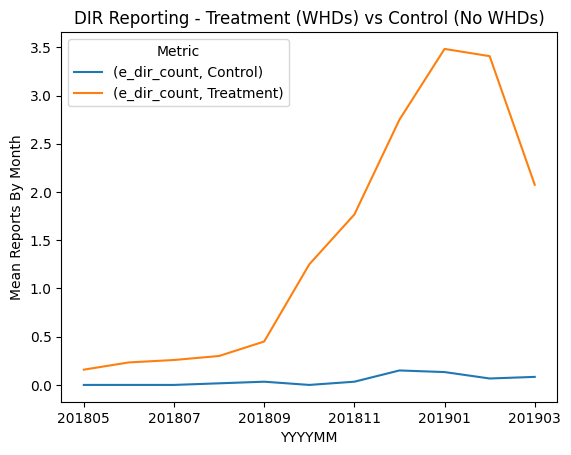

In [ ]:

# Create the bar plot
# Changed positional arguments to keyword arguments
q1_focused_df_agg.pivot(index='yyyymm', columns='treatment', values=['e_dir_count']).plot(kind='line')
plt.title('DIR Reporting - Treatment (WHDs) vs Control (No WHDs)')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()


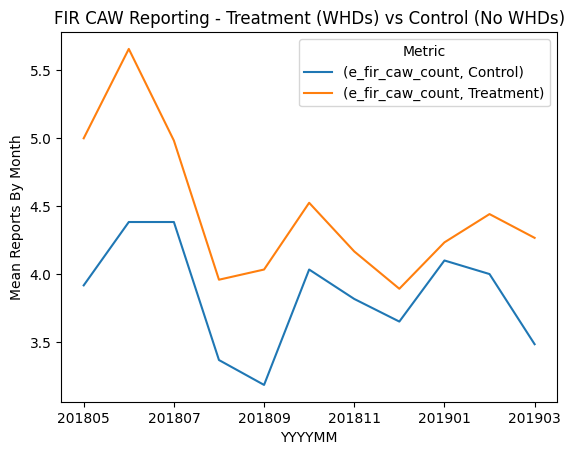

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q1_focused_df_agg.pivot(index='yyyymm', columns='treatment', values=['e_fir_caw_count']).plot(kind='line')
plt.title('FIR CAW Reporting - Treatment (WHDs) vs Control (No WHDs)')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()


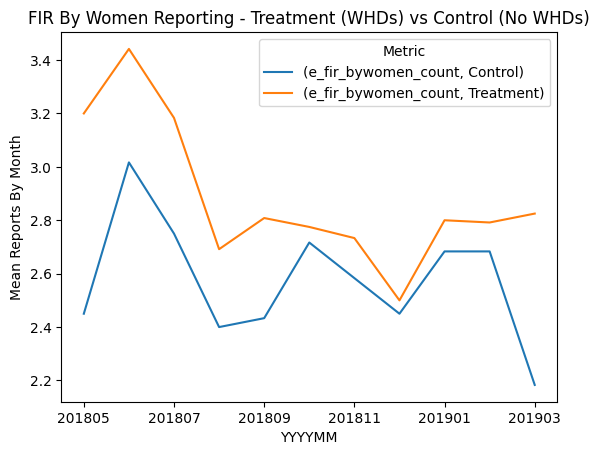

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q1_focused_df_agg.pivot(index='yyyymm', columns='treatment', values=['e_fir_bywomen_count']).plot(kind='line')
plt.title('FIR By Women Reporting - Treatment (WHDs) vs Control (No WHDs)')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()


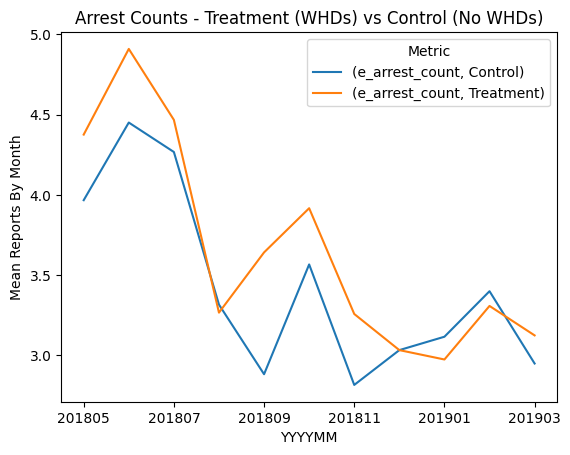

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q1_focused_df_agg.pivot(index='yyyymm', columns='treatment', values=['e_arrest_count']).plot(kind='line')
plt.title('Arrest Counts - Treatment (WHDs) vs Control (No WHDs)')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()


In [ ]:
# Shifting to Treatment Stations Only and Creating Same Line Charts Comparing Women Run WHDs to Regular WHDs

q1q2_focused_df_treat = q1q2_focused_df[q1q2_focused_df['treatment'] == 'Treatment']

# Calculating Mean Counts For Reporting Fields Aggregated to Treatment / Month

grouped = q1q2_focused_df_treat.groupby(['yyyymm','women_whd']).agg({'e_dir_count': 'mean', 'e_fir_caw_count': 'mean','e_fir_bywomen_count': 'mean', 'e_arrest_count': 'mean'})

# Convert the result to a DataFrame

q2_focused_df_agg_treat = grouped.reset_index()

print(q2_focused_df_agg_treat)


    yyyymm  women_whd  e_dir_count  e_fir_caw_count  e_fir_bywomen_count  \
0   201805        0.0     0.163934         4.377049             2.950820   
1   201805        1.0     0.152542         5.644068             3.457627   
2   201806        0.0     0.262295         5.491803             3.278689   
3   201806        1.0     0.203390         5.830508             3.610169   
4   201807        0.0     0.245902         5.147541             3.245902   
5   201807        1.0     0.271186         4.813559             3.118644   
6   201808        0.0     0.295082         3.409836             2.426230   
7   201808        1.0     0.305085         4.525424             2.966102   
8   201809        0.0     0.393443         3.573770             2.655738   
9   201809        1.0     0.508475         4.508475             2.966102   
10  201810        0.0     1.180328         3.819672             2.573770   
11  201810        1.0     1.322034         5.254237             2.983051   
12  201811  

In [ ]:
# Group by 'Category' and calculate the mean for multiple columns

means_by_group_agg = q2_focused_df_agg_treat.groupby('women_whd')[['e_dir_count', 'e_fir_caw_count','e_fir_bywomen_count','e_arrest_count']].mean()

print(means_by_group_agg)

           e_dir_count  e_fir_caw_count  e_fir_bywomen_count  e_arrest_count
women_whd                                                                   
0.0           1.526080         4.020864             2.697466        3.426230
1.0           1.405239         4.932203             3.081664        3.904468


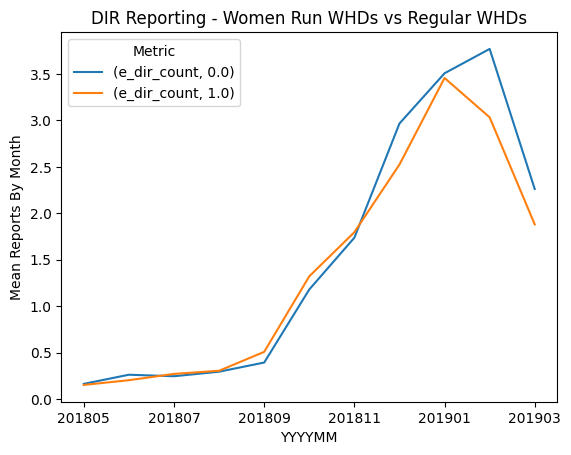

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q2_focused_df_agg_treat.pivot(index='yyyymm', columns='women_whd', values=['e_dir_count']).plot(kind='line')
plt.title('DIR Reporting - Women Run WHDs vs Regular WHDs')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()


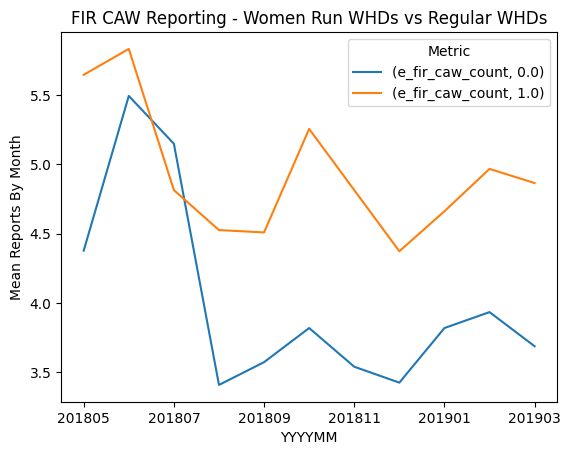

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q2_focused_df_agg_treat.pivot(index='yyyymm', columns='women_whd', values=['e_fir_caw_count']).plot(kind='line')
plt.title('FIR CAW Reporting - Women Run WHDs vs Regular WHDs')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()

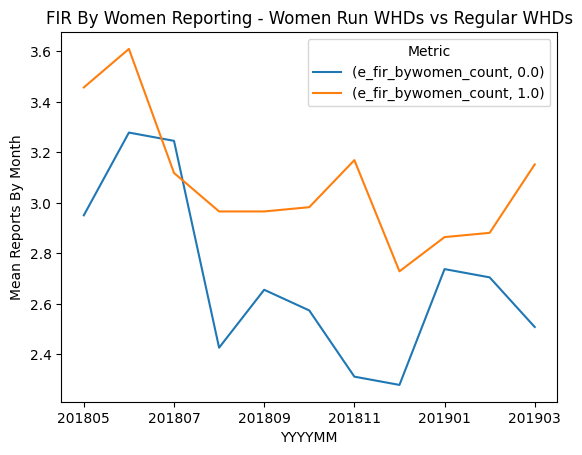

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q2_focused_df_agg_treat.pivot(index='yyyymm', columns='women_whd', values=['e_fir_bywomen_count']).plot(kind='line')
plt.title('FIR By Women Reporting - Women Run WHDs vs Regular WHDs')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()

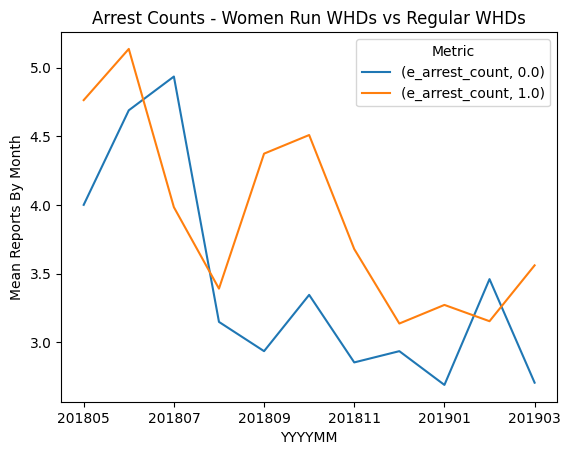

In [ ]:
# Create the bar plot
# Changed positional arguments to keyword arguments
q2_focused_df_agg_treat.pivot(index='yyyymm', columns='women_whd', values=['e_arrest_count']).plot(kind='line')
plt.title('Arrest Counts - Women Run WHDs vs Regular WHDs')
plt.xlabel('YYYYMM')
plt.ylabel('Mean Reports By Month')
plt.legend(title='Metric')
plt.show()

In [ ]:
# Output to the Aggregated Treatment vs Control Data CSV;

# Save the data to "cctv_full_data.csv"

q1q2_focused_df.to_csv("/content/drive/My Drive/Colab Notebooks/Final Project/Data/q1q2_focused_df_for_modeling.csv", index=False)